# Black Friday Dataset EDA and feature Engineering 

Cleaning and preparing the data for model training 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Problem Statement:
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
#importing the dataset
df_train=pd.read_csv('blackfriday_train.csv')
df_train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_test=pd.read_csv('BlackFriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
#merge train and test data 
df=pd.concat([df_train,df_test],ignore_index=True)
#ignore_index=True: Resets the index in the resulting DataFrame (recommended when combining datasets for training/testing).
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
# drop those feature in the table which are useless 
df.drop(['User_ID'], axis=1, inplace=True,errors='ignore')# axis =1 means delete it in columnwise
#implace =True: IT do that it will remove that user id and it will update automatically in the df value 
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


# fix the categorical features -GENDER

In [8]:
#1 way
#categorical into numerical 
pd.get_dummies(df['Gender'],drop_first=1,dtype=int) #This line performs one-hot encoding on the 'Gender' column in your DataFrame df.
#pandas.get_dummies() is a pandas function that converts categorical variables into a format that can be provided to machine learning algorithms, which typically require numerical input.

# this is the way but this you have to crate another dataframe then I have to add this data frame over in the main df and then delete this gender column ...so it is mire versitile process


,M
0,0
1,0
2,0
3,0
4,1
...,...
783662,0
783663,0
783664,0
783665,0


In [9]:
#2 way 
##probably I can directly convert  this wherever the gender is F convert it to 0 to 1 and wheather the gender is M i am going to convert it 0 to 1
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1}) # map method basically map with the respect to the conditions  that I am giving over here
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Handle categorical  feature-age

In [10]:
# transform age categorical feature into numerical feature 
df['Age'].unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
#pd.get_dummies(df['Age'],dtype=int,drop_first=True)

In [12]:
# not do get the get dummies technique  do some odinary  encoding only let's give rank to it like 0 1 2 3 4 5 ,it give becaue if I train the model my model maths will difinitely be able to understand w.r.t to the values that we are given w.r.t to other features my model definetly able to understand ,this is called target guiding  or target oridinal encoding

In [13]:
df['Age'] = df['Age'].map({'0-17': 1, '18-25': 2, '26-35':3, '36-45':4, '46-50':5 ,'51-55':6, '55+':7})
df['Age']

0         1
1         1
2         1
3         1
4         7
         ..
783662    3
783663    3
783664    3
783665    5
783666    5
Name: Age, Length: 783667, dtype: int64

In [14]:
#also label encoding can be done 
from sklearn import preprocessing

#label_enoder object knows how to understand word labels.
label_encoder=preprocessing.LabelEncoder()

#Encode labels in column 'Age'
df['Age']=label_encoder.fit_transform(df['Age'])
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [15]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
#fixing categorical City_category
df_city=pd.get_dummies(df['City_Category'],dtype=int,drop_first=True)
#The drop_first=True parameter in pd.get_dummies() is used to avoid the dummy variable trap in machine learning models.
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,0,1


In [17]:
#Now combine with the original df 
df_new=pd.concat([df,df_city],axis=1)
df_new.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
#now drop the city_category
df_new.drop('City_Category',axis=1,inplace=True)#It applies the changes directly to the original object. 

In [19]:
df_new.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


# Now check the missing values

In [20]:
df_new.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

Observation: Product_category has so many null value ,and  purchase also null value ,purchase are there because this is the test data that missing value is fine  only  but the the 2 product_category definetly fix it up 

In [21]:
#focus on replacing missing value
#Data explortion for that two feature
df_new['Product_Category_2'].unique() # the output become discreate  feature not continuous ..because this is only getting repeated 


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
df_new['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [23]:
# Replace the missing values with mode  don't use mean because mean will create a new category  altogether  so use  mode
df_new['Product_Category_2'].mode()[0]

np.float64(8.0)

In [24]:
# Replace the missing values with mode  don't use mean because mean will create a new category  altogether  so use  mode 
df_new['Product_Category_2']=df_new['Product_Category_2'].fillna(df_new['Product_Category_2'].mode()[0])
#.mode() Returns the most frequent value(s) in the column.
#[0] Picks the first mode value (in case there are multiple modes).This becomes the value used to fill in missing data.
#.fillna(...) Replaces all NaN (missing) values in Product_Category_3 with the value inside (...).
df_new['Product_Category_2']

0          8.0
1          6.0
2          8.0
3         14.0
4          8.0
          ... 
783662     8.0
783663     8.0
783664     5.0
783665    16.0
783666     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [25]:
df_new['Product_Category_2'].isnull().sum()

np.int64(0)

the value become 0  so my replacement  has happend

In [26]:
#for the product category 3 replace missing values 
df_new['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [27]:
df_new['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [28]:
# Replace the missing values with mode  don't use mean because mean will create a new category  altogether  so use  mode 
df_new['Product_Category_3']=df_new['Product_Category_3'].fillna(df_new['Product_Category_3'].mode()[0])
#.mode() Returns the most frequent value(s) in the column.
#[0] Picks the first mode value (in case there are multiple modes).This becomes the value used to fill in missing data.
#.fillna(...) Replaces all NaN (missing) values in Product_Category_3 with the value inside (...).
df_new['Product_Category_3']

0         16.0
1         14.0
2         16.0
3         16.0
4         16.0
          ... 
783662    16.0
783663    16.0
783664    12.0
783665    16.0
783666    16.0
Name: Product_Category_3, Length: 783667, dtype: float64

In [29]:
df_new.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,0,1


We should not to drop the product category becuse the sahpe is 7lakh,12 and in  the product category the 5 lakh values are missing so must be those are important information 

In [30]:
df_new.shape

(783667, 12)

In [31]:
#now let fix the 'Stay_In_Current_City_Years'
df_new['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [32]:
df_new['Stay_In_Current_City_Years'] = df_new['Stay_In_Current_City_Years'].str.replace('+', '', regex=False) #This removes the literal +, because regex=False treats '+' as a plain character.


In [33]:
df_new.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 71.7+ MB


observation : As you see know till now  Stay_In_Current_years  is object but it all values are int value so  we have to convert it to int type

In [35]:
df_new['Stay_In_Current_City_Years']=df_new['Stay_In_Current_City_Years'].astype(int)
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


# Visualization



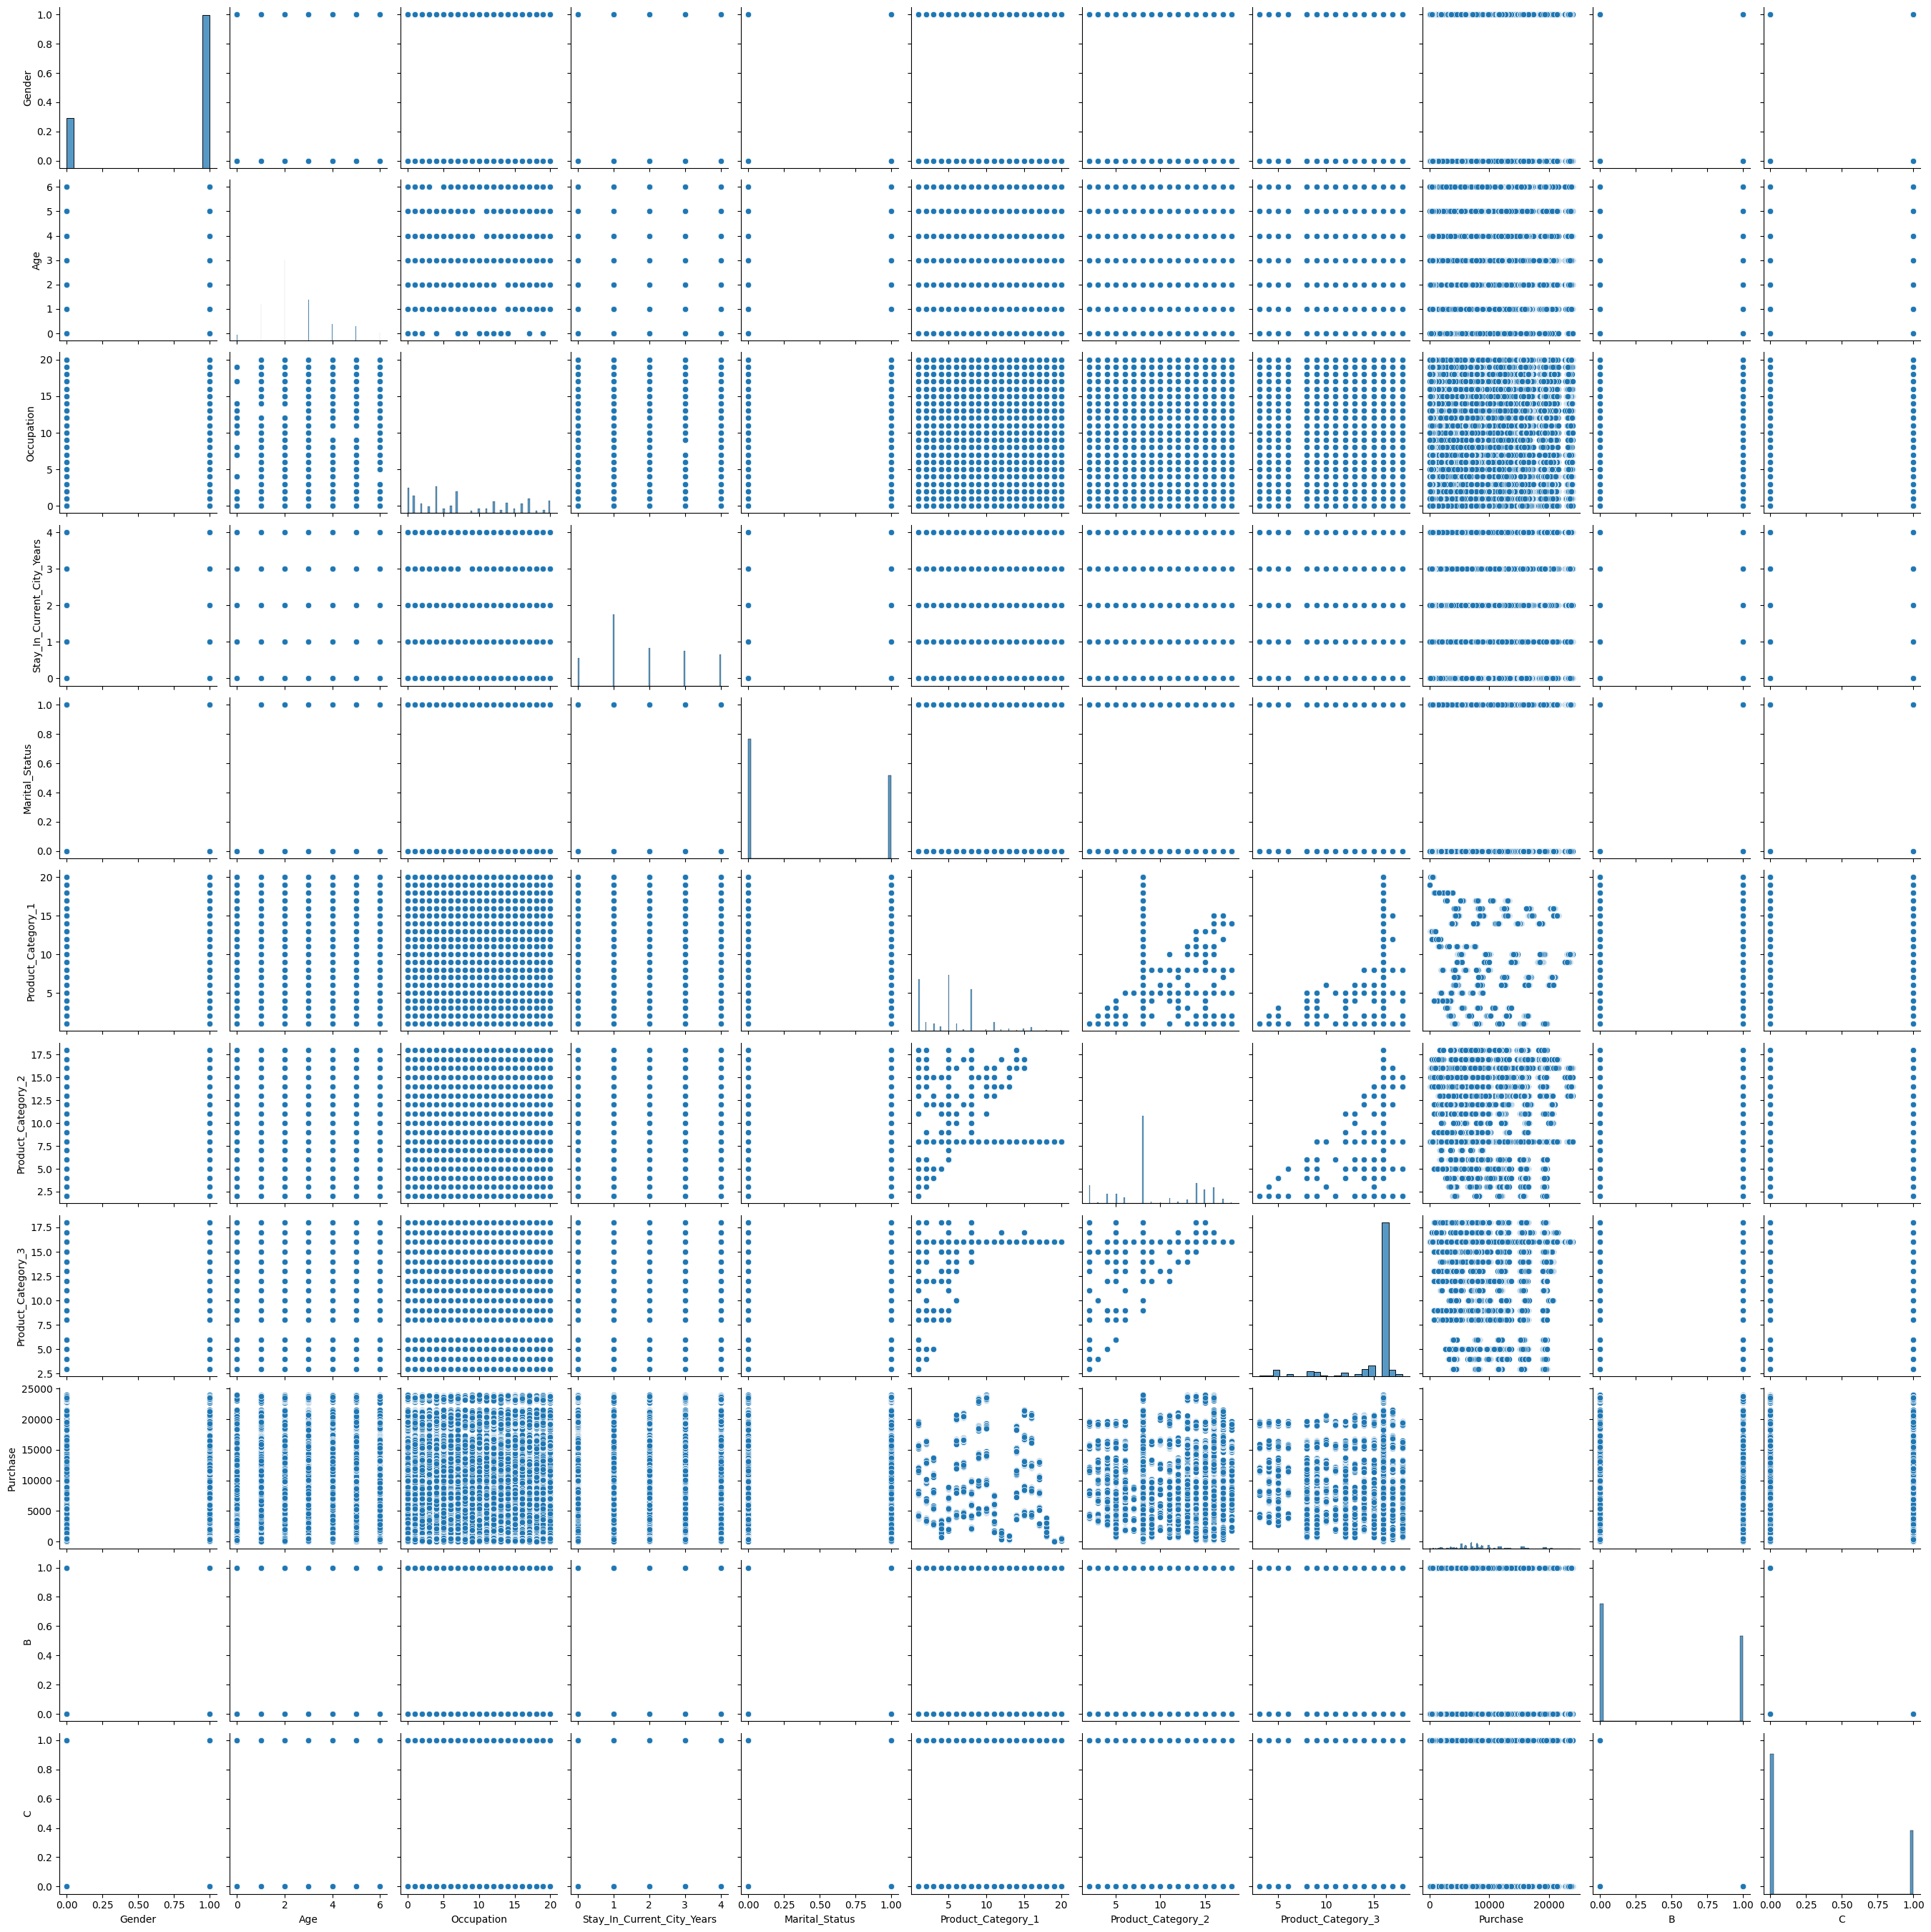

In [36]:
sns.pairplot(df_new)

<Axes: xlabel='Age', ylabel='Purchase'>

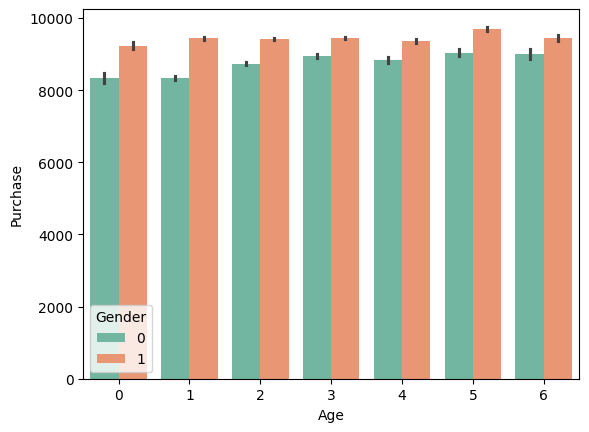

In [37]:
#visualization between age vs purchase  and check who more purchase male or female --------------0 female ,1 male
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df_new,palette='Set2')
#The hue parameter in Seaborn (e.g., in sns.barplot, sns.scatterplot, etc.) is used to group and differentiate data visually by color based on the unique values of a categorical variable.
#hue='Gender': breaks each age group into two bars — one for male and one for female — using different colors.
#palette='Set2': a set of 8 colors that are used to color the bars.A default color palette is used if you don't specify one.



Observation 
purchasing of goods of each range are equal  but we can conclude definetly that the purchasing percentage of goods of men 's range is higher than that of women's range. 


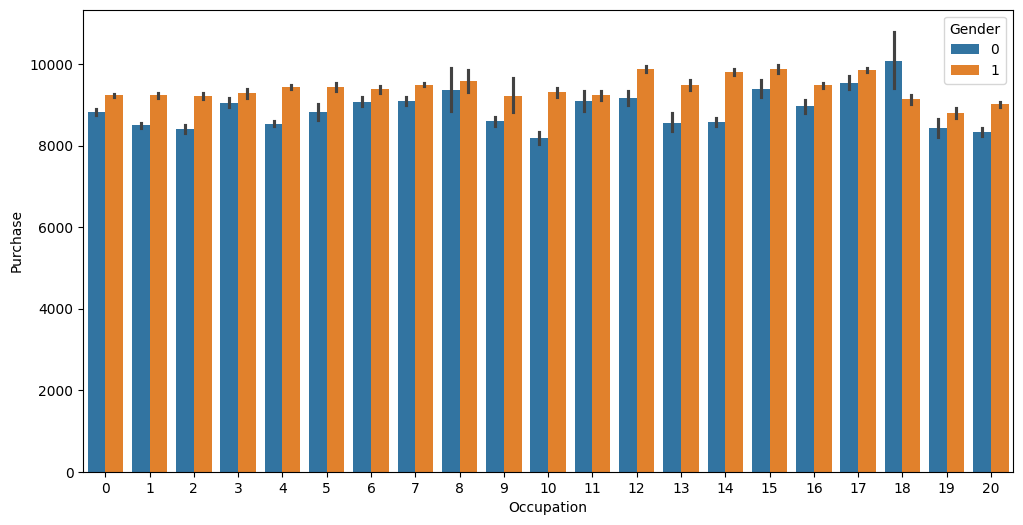

In [38]:
#visualization of purchase with occupation
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df_new)
plt.show()#this line is optional




<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

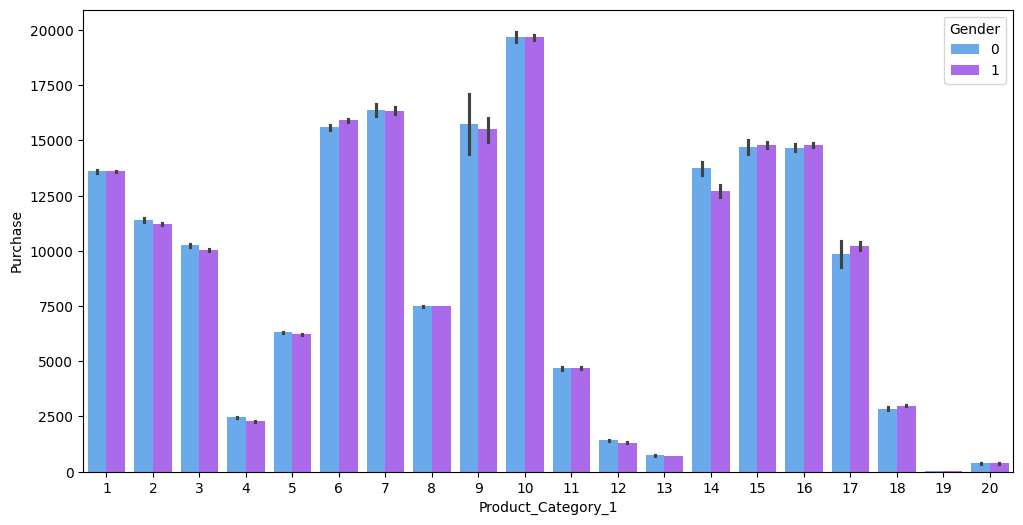

In [39]:
#visualization of  Product_Category_1   with purchase
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df_new,palette='cool')


<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

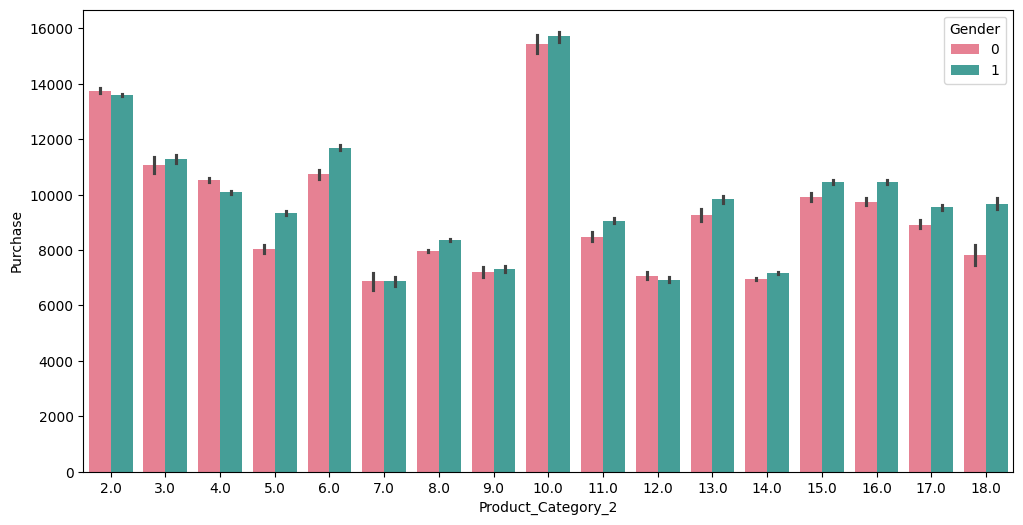

In [40]:
#visualization of  Product_Category_2   with purchase
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df_new,palette='husl')


<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

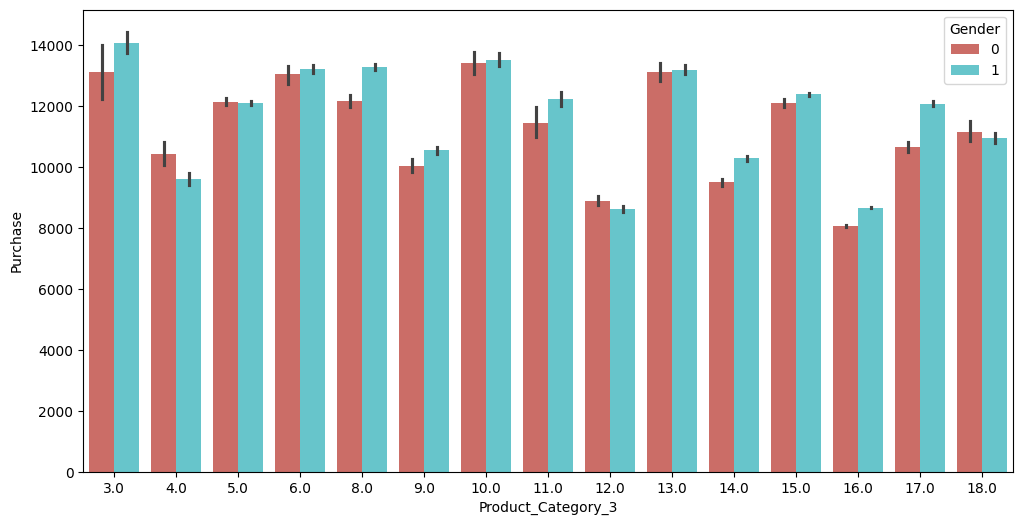

In [41]:
#visualization of  Product_Category_3   with purchase
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df_new,palette='hls')

DATA preprocessing is done for model training

In [64]:
df_new_test=df_new[df_new['Purchase'].isnull()]
#✅ Creates df_new_test

#Includes only rows where 'Purchase' is null/missing

#Used as test data (you want to predict the Purchase values)



 These two lines are used to split a DataFrame (df_new) into two parts — one with missing target values (Purchase) and one with non-missing target values.

In [65]:
# when the purchase column is null right that all belongs to test data  so I am trying to find out apart from is null how do i Find out if it is not null 
df_new_train=df_new[~df_new['Purchase'].isnull()]
#✅ Creates df_new_train

#Includes rows where 'Purchase' is not null (~ means "not")

#Used as training data (you already know the Purchase values)

Feature scaling (like standardization or normalization) should always be:

Fitted only on training data

Applied to both training and test data using the same parameters

Your two lines split the data into train/test based on whether the target (Purchase) is missing.

Feature scaling should be done after the split, and scaler must be fitted on training data only.

This keeps your model realistic and avoids information leakage.

In [66]:
X=df_new_train.drop('Purchase',axis=1)

In [67]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,0,1


In [68]:
X.shape

(550068, 11)

In [71]:
y=df_new_train['Purchase']
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [72]:
y.shape

(550068,)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [74]:
#last thing we have to drop before feature scaling 
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [75]:
X_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
396876,1,1,14,3,0,1,2.0,16.0,1,0
433826,1,5,0,0,1,8,16.0,16.0,0,0
516298,1,3,17,0,0,3,4.0,12.0,0,1
193380,1,2,4,1,0,8,16.0,16.0,1,0
273542,0,3,20,3,1,3,4.0,12.0,1,0
...,...,...,...,...,...,...,...,...,...,...
110268,1,4,17,2,0,5,8.0,16.0,0,1
259178,1,2,14,2,1,5,8.0,16.0,0,1
365838,0,1,1,1,0,5,8.0,16.0,1,0
131932,0,1,4,2,0,8,14.0,16.0,1,0


In [76]:
X_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
84432,1,5,19,3,0,1,2.0,16.0,0,1
72724,0,3,11,1,0,1,15.0,16.0,1,0
197032,0,3,0,2,1,8,15.0,16.0,0,0
353704,1,1,4,3,0,1,15.0,16.0,0,0
91198,1,1,4,0,0,6,8.0,16.0,1,0
...,...,...,...,...,...,...,...,...,...,...
196106,1,3,0,1,1,8,8.0,16.0,1,0
109474,0,3,1,1,0,11,15.0,16.0,0,1
433228,1,1,2,2,0,3,5.0,16.0,0,1
271831,1,3,7,1,0,1,2.0,15.0,0,1


In [77]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#fit the data and transform it
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


Done of complete Data analysis now train your model now model is cleaning for train

In [54]:
#train your model
